# Overwiev and Exploration of Dataset
Robin Feldmann


<hr/>

## 00 Introduction 

This Notebook shows the steps done to prepare and explore the dataset. This aims to make everything reproducible.
To see implementation details, see ./src folder. 
Code that is commented out, should not be run, either because it is very computional heavy or because it has sideeffects that should not be repeated.




In [27]:
path_2023 = "/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/2023/"
path_2022 = "/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/2022"

## 01 Data Source and Information about Provider

This section answers following questions:

    1. Where does the dataset come from?
    2. Who collected the dataset?
    3. How was the dataset collected?
    4. Was the dataset prepared after downloading?
    5. Informations about files

### 1. Where does the dataset come from?
The dataset was downloaded from the online platform [Kaggle](https://www.kaggle.com/). Kaggle is an online community for data science and machine learning (ML) enthusiasts. It is a top learning tool for novices and pros, with realistic practice problems to sharpen your data science skills.

Owned by Google, it is currently the world’s largest crowdsourced web platform for data scientists and ML practitioners. Thus, Kaggle gives you access to several professionals in your field that you can brainstorm, compete, and solve real-life problems with. [[ "A Beginner's Guide to Kaggle for Data Science"](https://www.makeuseof.com/beginners-guide-to-kaggle/). MUO. 2023-04-17. Retrieved 2023-06-10.]

The dataset can be downloaded for free and with no restrictions here: [Link to Website](https://www.kaggle.com/datasets/bwandowando/ukraine-russian-crisis-twitter-dataset-1-2-m-rows/data).

### 2. Who collected the dataset?
The dataset was published on Kaggle by User [BwandoWando](https://www.kaggle.com/bwandowando). 
There are not many additional information available on BwandoWando.

### 3. How was the dataset collected?
Couldn't find any information about how the dataset was collected.

###  4. Was the dataset prepared after downloading?


The dataset was downloaded on 15.10.23.
After the dataset was downloaded, all the files were unzipped. Data structure of the downlaoded directory was like this:

archive/{alot_of_files.csv} \
archive/UkraineWar/UkraineWar/{alot_of_files.csv}


In [1]:
from src.prepare_files_01 import move_files_into_one_dir, split_csv_by_date, merge_splitted_files, rename_files

PATH_TO_ARCHIVE = "/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/archive"

All files from the nested directory were moved into the same level.
Files containing data of for multiples days were splitted.
Files that were splitted over multiples files for a single day were merged.
Files were renamemd to format YYYYMMDD.csv.

In [ ]:
#move_files_into_one_dir(PATH_TO_ARCHIVE)
#split_csv_by_date(PATH_TO_ARCHIVE)
#merge_splitted_files(PATH_TO_ARCHIVE)
#rename_files(PATH_TO_ARCHIVE)

### 5. Information about files

In [2]:
from src.prepare_files_01 import print_folder_stats

print_folder_stats(PATH_TO_ARCHIVE)

Number of files: 476
First date: 20220224.csv, Last date: 20230614.csv
Average file size: 95.06 in mb


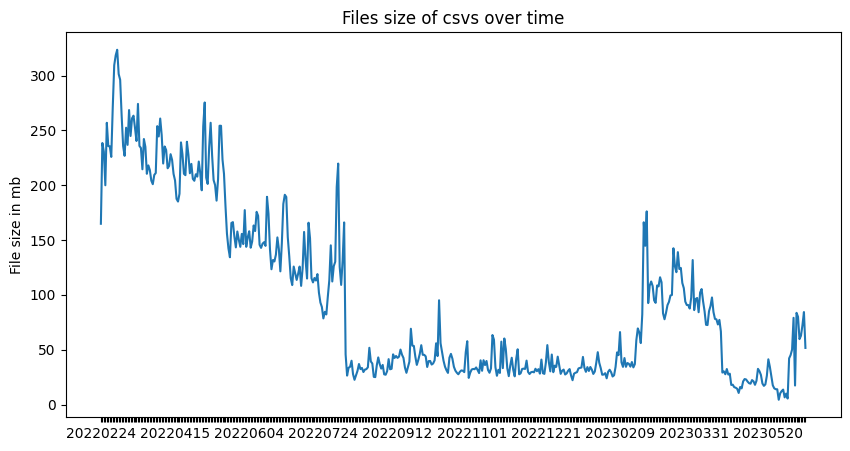

In [3]:
from src.prepare_files_01 import plot_file_sizes

plot_file_sizes(PATH_TO_ARCHIVE)

## 02 First Exploration

This section aims to provide a generall understanding of the unprocessed data. Folowing questions aim to be answered:

    1. How many tweets are provided?
    2. Which timespan is covered by the data?
    2. How many tweets are provided distributed over time?
    3. How many tweets are provided in each language?
    4. How many tweets are provided in each language distributed over time?
    5. How many tweets are duplicated on the same day?
    6. How many tweets are duplicated on the same day distributed over time?
    7. How many tweets are duplicated on the same day distributed over languages?

Those insights are necessary to prepare for further processing steps like deciding which data to keep and or translate.
Also those informations can be used later on to check if changes on the dataset were correct.

<hr/>

### Imports and settings

### Create or load aggregated data

In [1]:
from src.first_exploration_02 import aggregate_data, get_all_aggregated_data
import pandas as pd

path_data = "/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/archive/"
agg_path = "/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/AggregatedData/agg.csv"

#aggregate_data(path_data, agg_path)
df_agg = pd.read_csv(agg_path)



/usr/local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Functionality for data exploration

In [2]:
import numpy as np

languages = np.array(['am', 'ar', 'bg', 'bn', 'ca', 'ckb', 'cs', 'cy', 'da', 'de', 'dv', 'el',
       'en', 'es', 'et', 'eu', 'fa', 'fi', 'fr', 'gu', 'hi', 'ht', 'hu', 'hy',
       'in', 'is', 'it', 'iw', 'ja', 'ka', 'kn', 'ko', 'lt', 'lv', 'ml', 'mr',
       'my', 'ne', 'nl', 'no', 'or', 'pa', 'pl', 'ps', 'pt', 'ro', 'ru', 'si',
       'sl', 'sr', 'sv', 'ta', 'te', 'th', 'tl', 'tr', 'uk', 'und', 'ur', 'vi',
       'zh','sd', 'km', 'lo', 'ug', 'bo'])

selected_languages = np.array(['en','de','fr','it','es','uk','ru'])

### Exploration in Numbers

In [3]:
from src.first_exploration_02 import exploration_in_numbers

exploration_in_numbers(df_agg)

Tweets total: 70885956.
First date: 2022-02-24.  Last date: 2023-06-14. Unique dates: 476.
Tweets duplicated or retweeted on the same day total: 40775304. Tweets duplicated on the same day percent: 57.52%
Tweets not duplicated or retweeted on the same day total: 30110652
Tweets in a single file on average: 148920.0756302521, with variance: 17414183791.64479 and max: 567745 and min: 6892 


In [4]:
from src.first_exploration_02 import languages_tabular

#languages_tabular(df_agg, selected_languages)
languages_tabular(df_agg, languages)

Language   |           Count |       Freq |     Dupl % 
en         |        44416876 |     62.66% |     62.91%  
und        |         3898230 |      5.50% |     24.57%  
de         |         3872212 |      5.46% |     53.51%  
fr         |         3795086 |      5.35% |     66.05%  
it         |         3262053 |      4.60% |     58.51%  
es         |         3113760 |      4.39% |     60.38%  
uk         |         1541110 |      2.17% |     35.42%  
ru         |          964087 |      1.36% |     42.04%  
tr         |          712295 |      1.00% |     48.80%  
ja         |          689466 |      0.97% |     38.64%  
th         |          519436 |      0.73% |     84.02%  
pl         |          473500 |      0.67% |     55.67%  
hi         |          375793 |      0.53% |     44.53%  
nl         |          313306 |      0.44% |     44.56%  
pt         |          286341 |      0.40% |     26.57%  
ar         |          268238 |      0.38% |     38.11%  
in         |          224853 |  

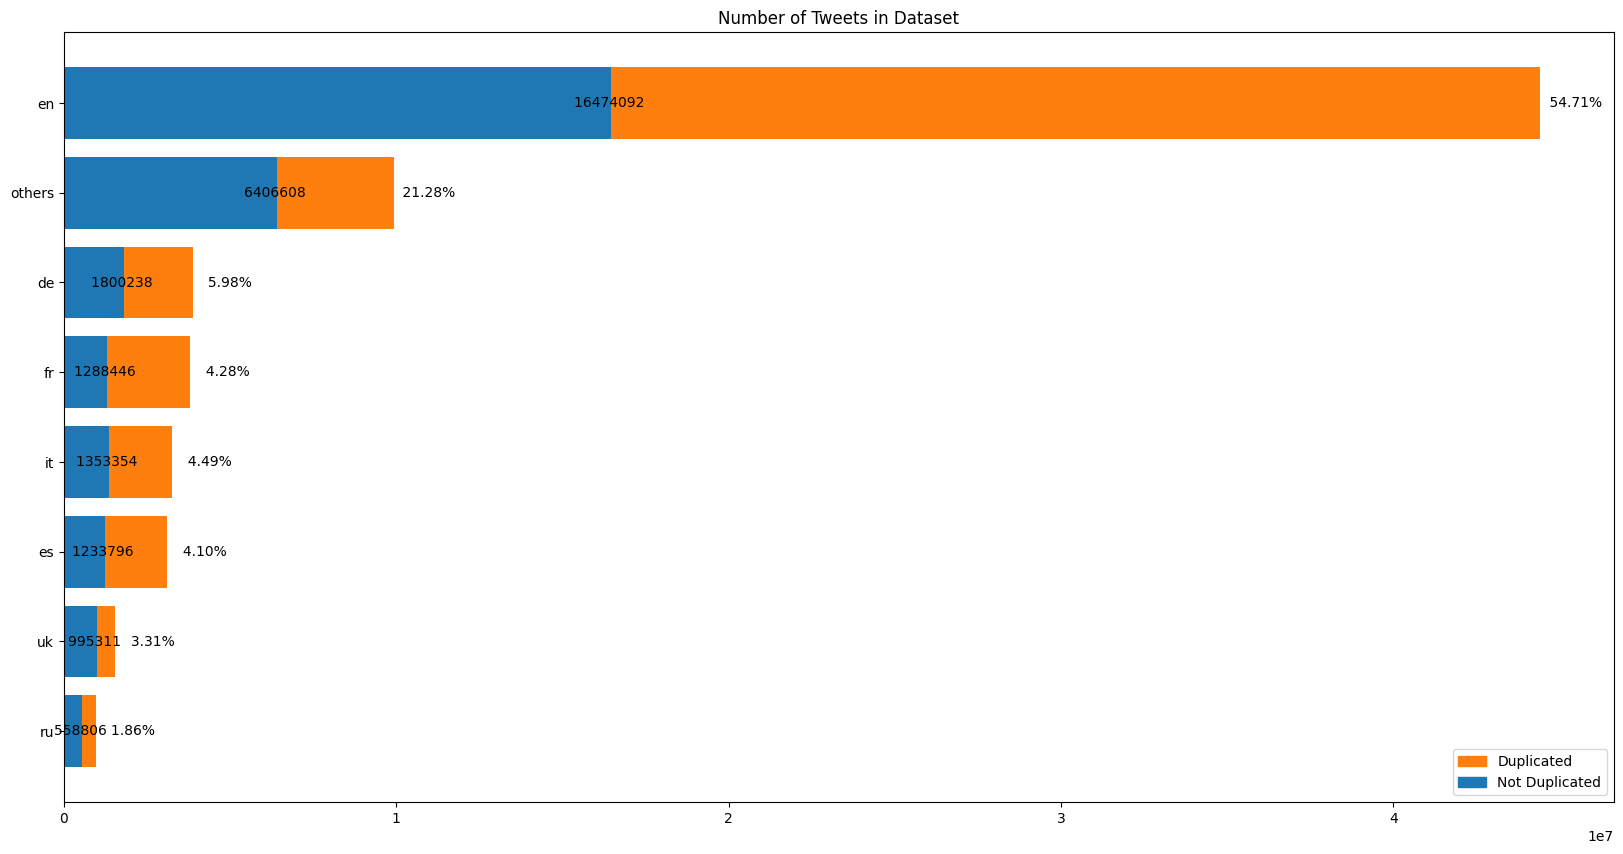

In [5]:
from src.first_exploration_02 import languages_bar_h

languages_bar_h(df_agg, selected_languages)

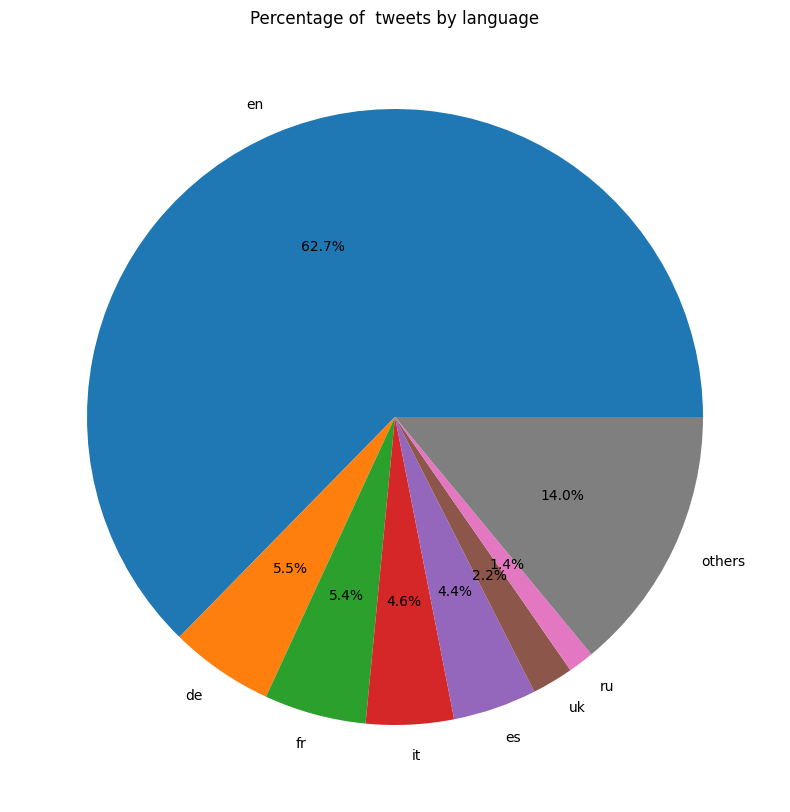

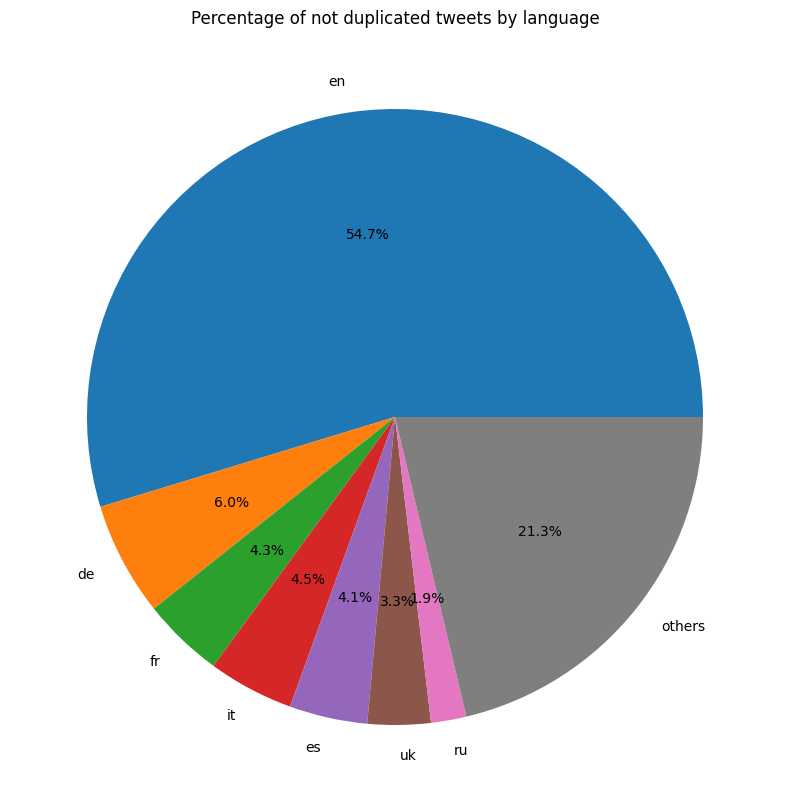

In [6]:
from src.first_exploration_02 import pi_lang_freq


pi_lang_freq(df_agg, selected_languages, not_dupl=False)
pi_lang_freq(df_agg, selected_languages, not_dupl=True)


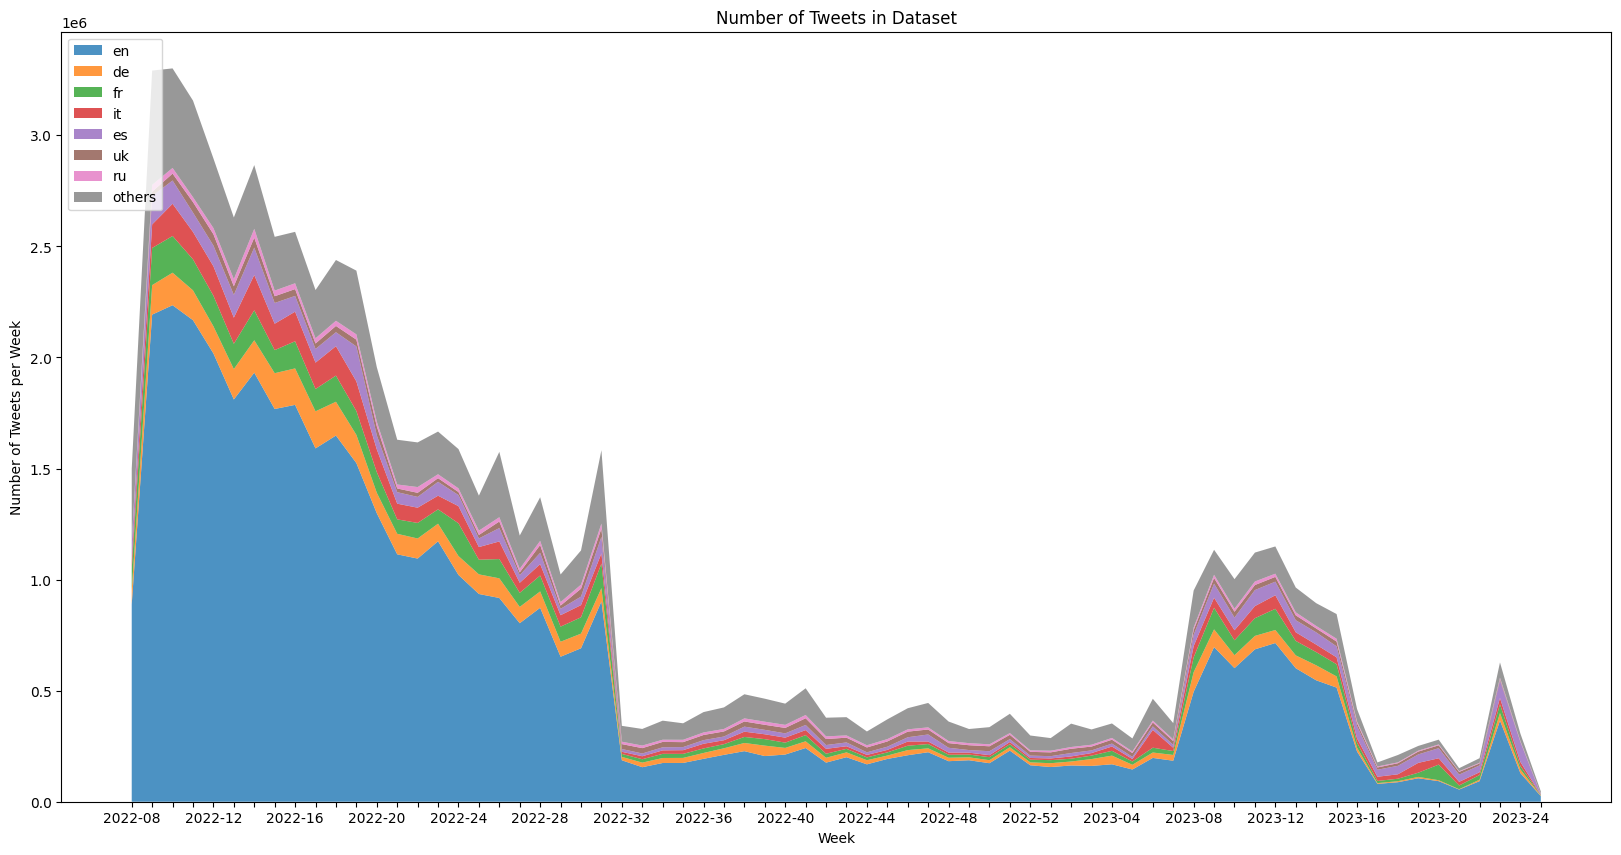

In [7]:
from src.first_exploration_02 import stackplot_languages_over_weeks

stackplot_languages_over_weeks(df_agg, selected_languages) 

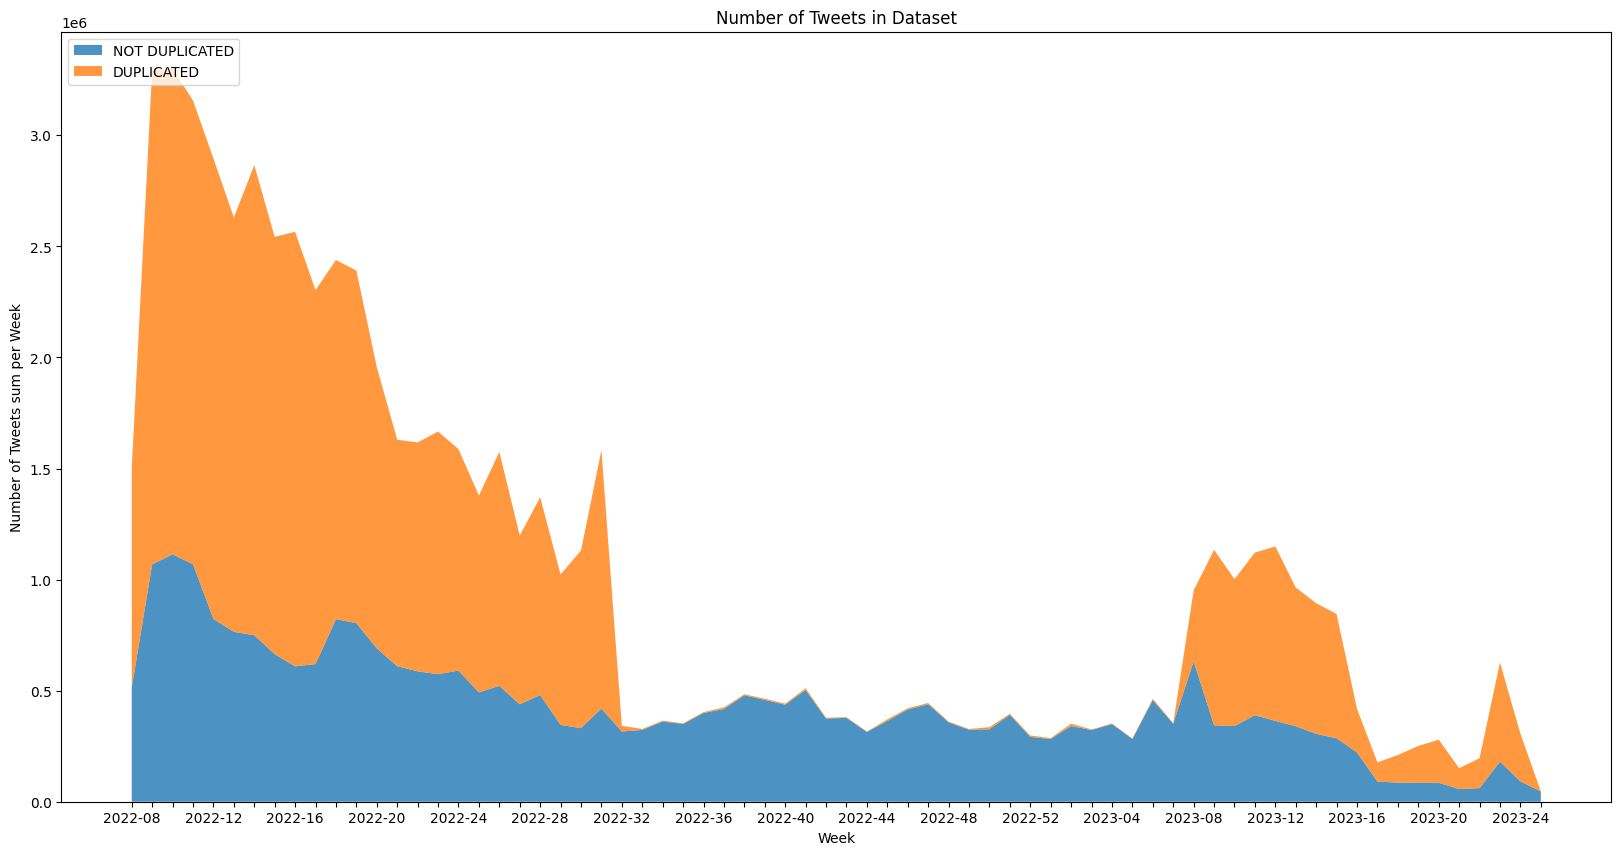

In [8]:
from src.first_exploration_02 import stackplot_duplicates_over_weeks

stackplot_duplicates_over_weeks(df_agg)

Explanation:
[Link to Kaggle](https://www.kaggle.com/datasets/bwandowando/ukraine-russian-crisis-twitter-dataset-1-2-m-rows/data)

The creator of this dataset states the following:

[Aug 09]
Significant drop in tweets extracted, but I am now getting ORIGINAL/ NON-RETWEETS.

[Aug 08]
I've noticed that I had a spike of Tweets extracted, but they are literally thousands of retweets of a single original tweet. I also noticed that my crawlers seem to deviate because of this tactic being used by some Twitter users where they flood Twitter with tweets using a hashtag like "#Ukraine" but also add their own hashtag in it. Starting tomorrow, all the extracted data I will be pulling out of twitter will be NON RETWEETS. I will observe on what will be the effect on the total tweets per day for this config change. 

And:

[Feb 26]
I've started to pull in RETWEETS again, so I am expecting a significant amount of throughput in tweets again on top of the dedicated processes that I have that gets NONRETWEETS. If you don't want RETWEETS, just filter them out. 


Which explains the drop of duplicated tweets around 2022-32 and the increase around 2023-08.

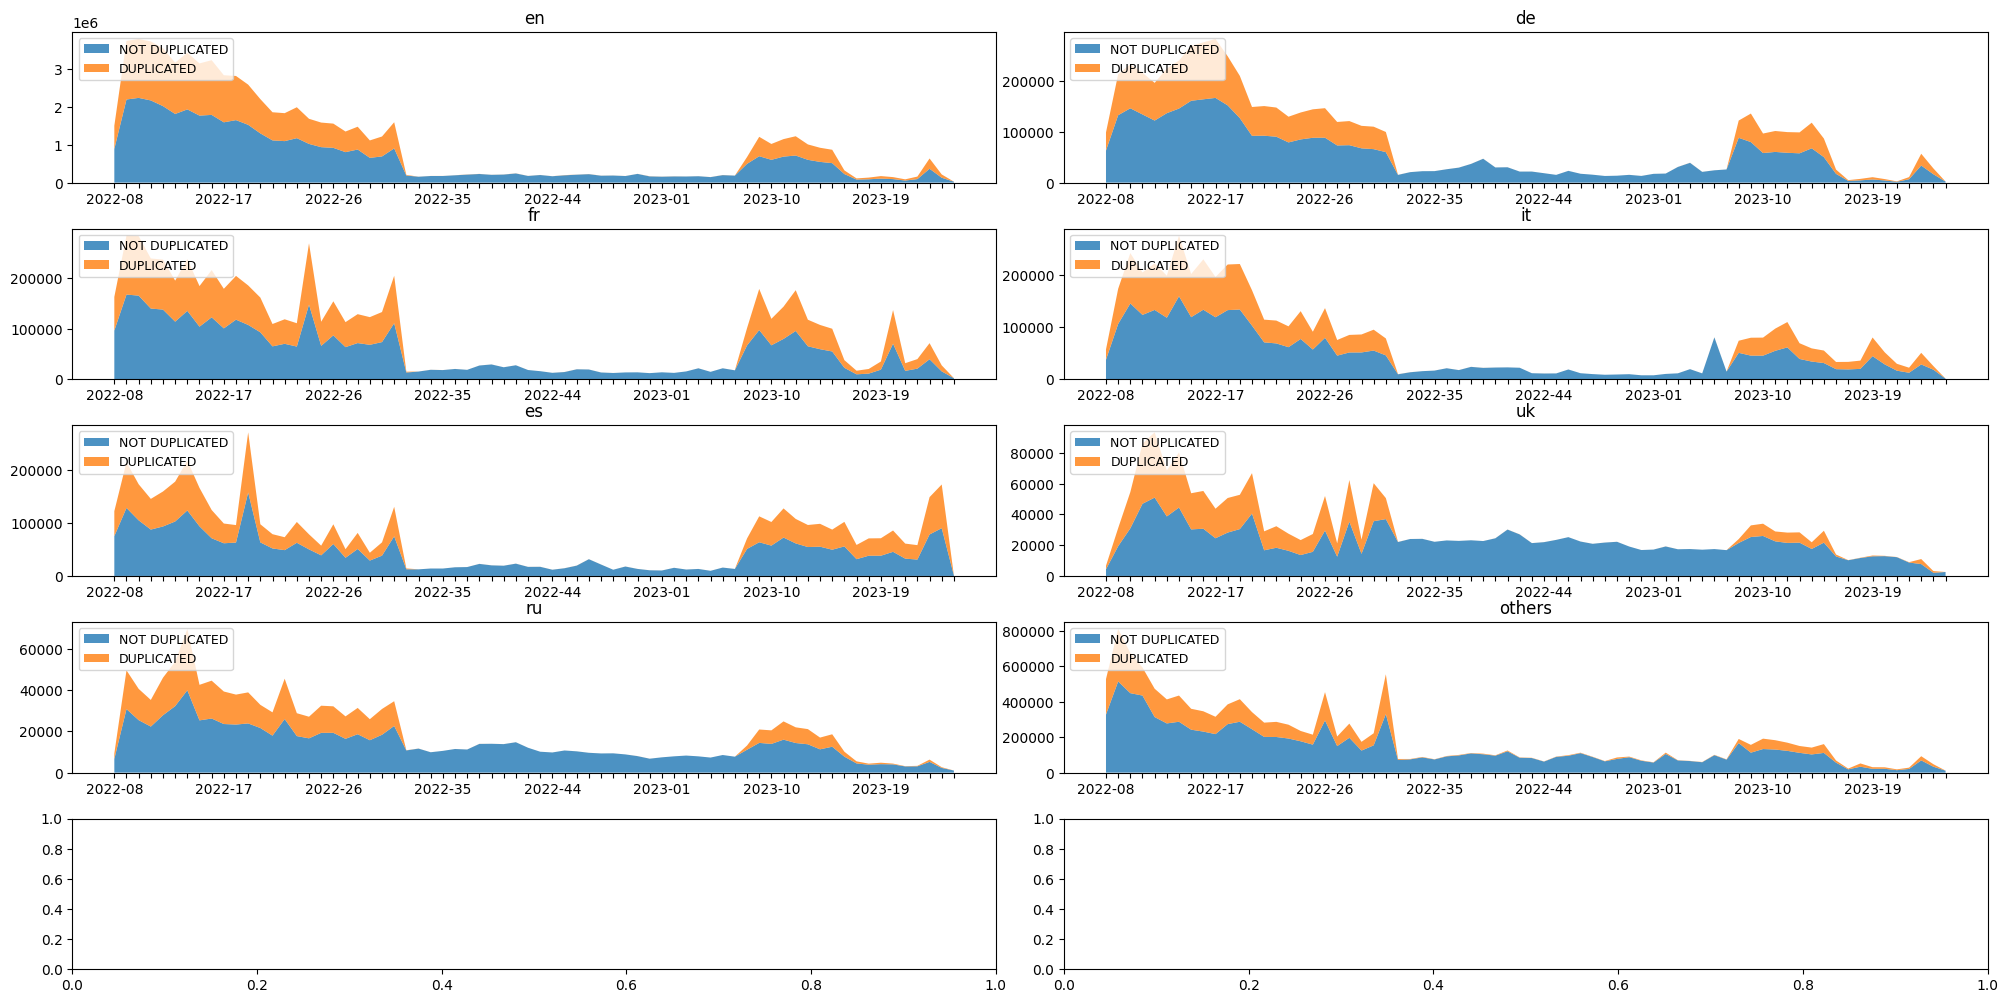

In [3]:
from src.first_exploration_02 import stackplot_duplicates_over_weeks_multipl
    
stackplot_duplicates_over_weeks_multipl(df_agg, selected_languages)